In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train,_),(_,_)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train=(X_train.astype("float32")-127.5)/127.5
print(X_train.min())
print(X_train.max())

-1.0
1.0


In [5]:
TOTAL_EPOCHS=50
BATCH_SIZE=256
NO_OF_BATCHES=X_train.shape[0]//BATCH_SIZE
HALF_BATCH=128
NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
# Generator -> Upsampling
# Input dim=100 => 784 (28,28)

generator=Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784,activation="tanh"))

generator.compile(loss="binary_crossentropy",optimizer=adam)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [7]:
# Descriminator ->Downsampling
# 784 input, and outputs probability for real image (0 or 1)

discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy",optimizer=adam)
discriminator.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
__________________________

In [8]:
# Create GAN
discriminator.trainable=False

gan_input=Input(shape=(NOISE_DIM,))
generate_img=generator(gan_input)
gan_output=discriminator(generate_img)

# Function API combine

model=Model(inputs=gan_input,outputs=gan_output)
model.compile(loss="binary_crossentropy",optimizer=adam)

In [9]:
X_train=X_train.reshape(-1,784)
X_train.shape

(60000, 784)

## Training GAN

c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 disc loss 0.6667 Generator Loss 0.8944
Epoch 2 disc loss 0.6638 Generator Loss 0.9095
Epoch 3 disc loss 0.6661 Generator Loss 0.9013
Epoch 4 disc loss 0.6645 Generator Loss 0.9033
Epoch 5 disc loss 0.6654 Generator Loss 0.9060


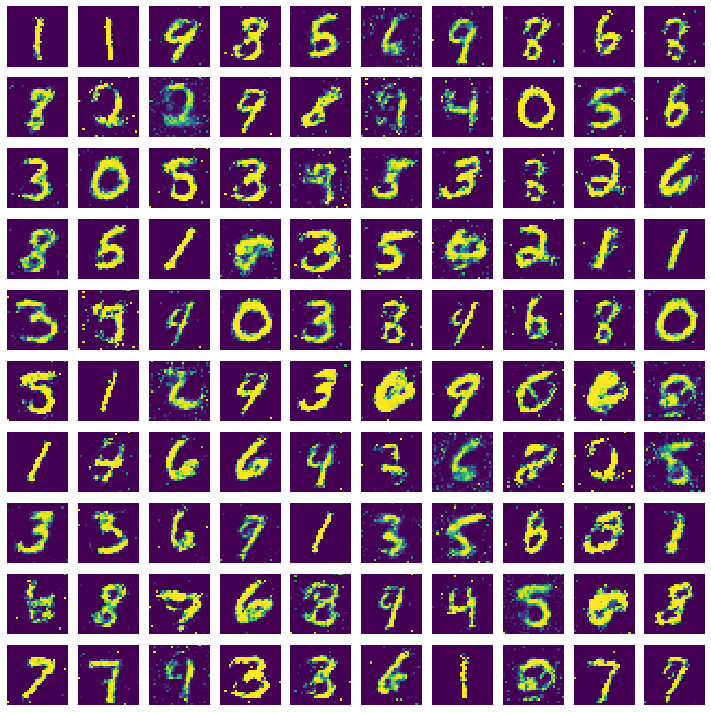

Epoch 6 disc loss 0.6650 Generator Loss 0.8983
Epoch 7 disc loss 0.6608 Generator Loss 0.9101
Epoch 8 disc loss 0.6644 Generator Loss 0.9105
Epoch 9 disc loss 0.6603 Generator Loss 0.9171
Epoch 10 disc loss 0.6612 Generator Loss 0.9180


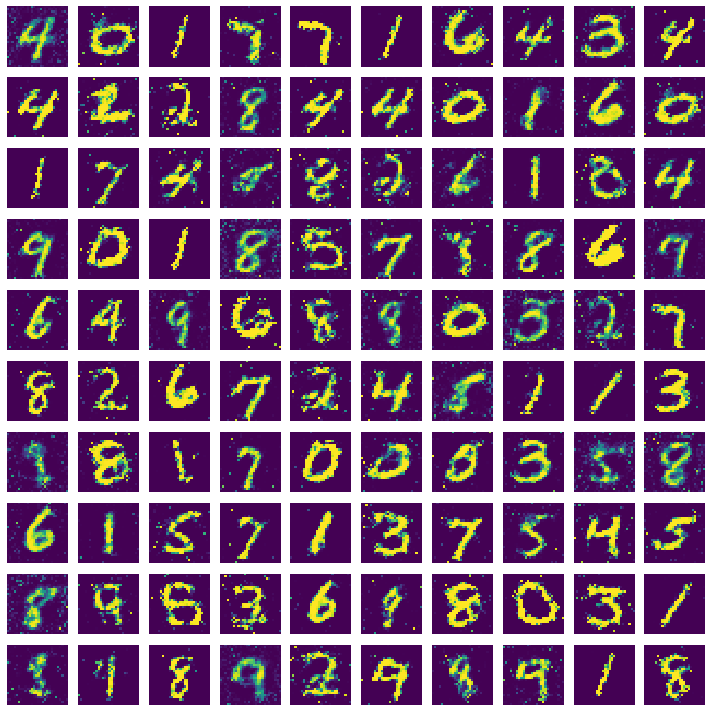

Epoch 11 disc loss 0.6626 Generator Loss 0.9086
Epoch 12 disc loss 0.6621 Generator Loss 0.9084
Epoch 13 disc loss 0.6574 Generator Loss 0.9157
Epoch 14 disc loss 0.6564 Generator Loss 0.9293
Epoch 15 disc loss 0.6587 Generator Loss 0.9226


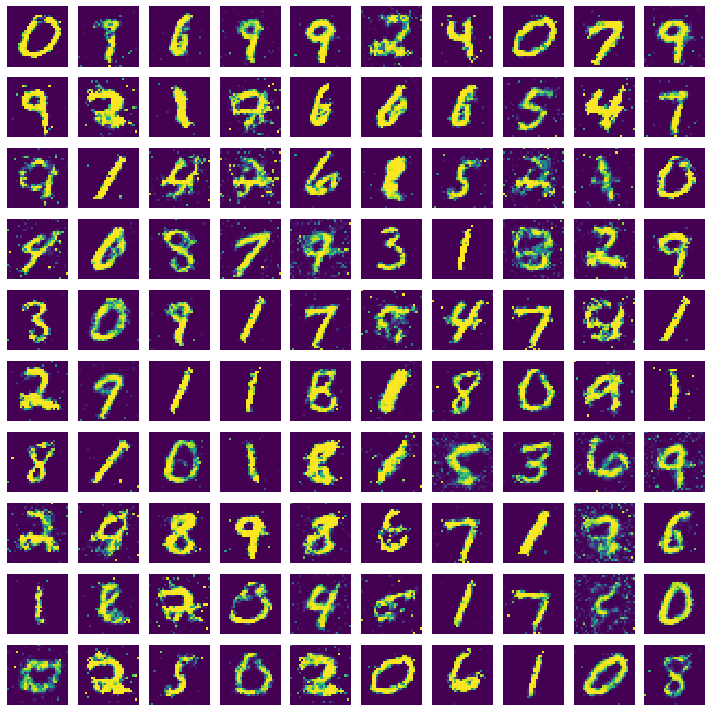

Epoch 16 disc loss 0.6593 Generator Loss 0.9169
Epoch 17 disc loss 0.6554 Generator Loss 0.9262
Epoch 18 disc loss 0.6553 Generator Loss 0.9292
Epoch 19 disc loss 0.6575 Generator Loss 0.9206
Epoch 20 disc loss 0.6526 Generator Loss 0.9331


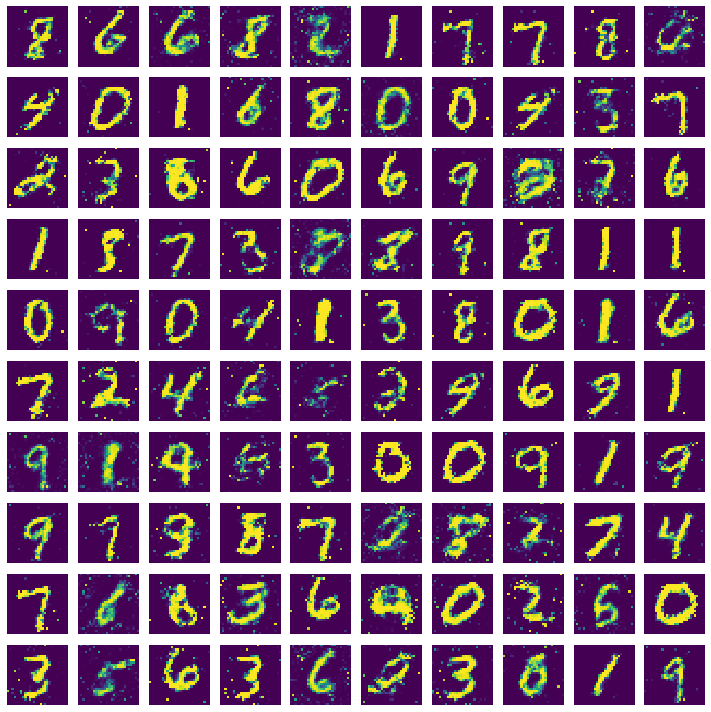

Epoch 21 disc loss 0.6561 Generator Loss 0.9257
Epoch 22 disc loss 0.6547 Generator Loss 0.9273
Epoch 23 disc loss 0.6524 Generator Loss 0.9348
Epoch 24 disc loss 0.6512 Generator Loss 0.9398
Epoch 25 disc loss 0.6495 Generator Loss 0.9415


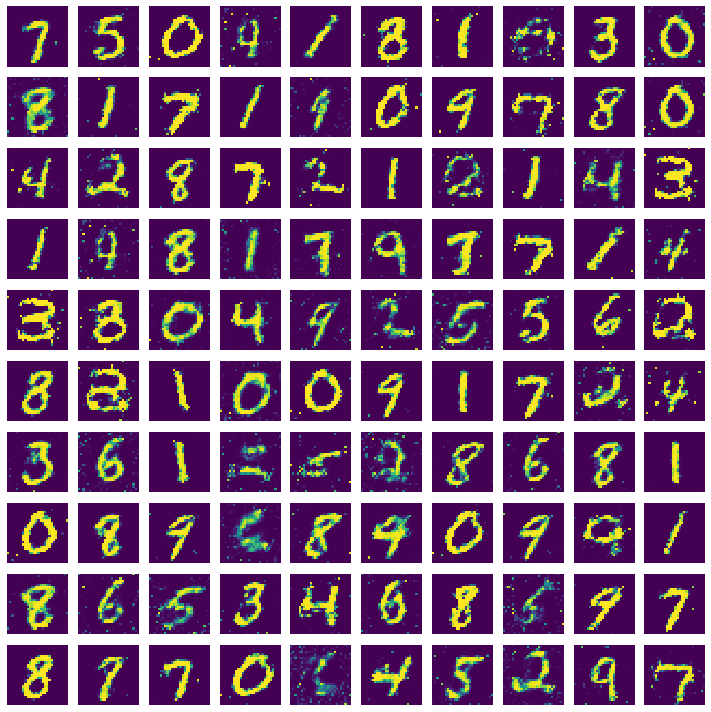

Epoch 26 disc loss 0.6509 Generator Loss 0.9420
Epoch 27 disc loss 0.6499 Generator Loss 0.9439
Epoch 28 disc loss 0.6470 Generator Loss 0.9512
Epoch 29 disc loss 0.6502 Generator Loss 0.9424
Epoch 30 disc loss 0.6500 Generator Loss 0.9428


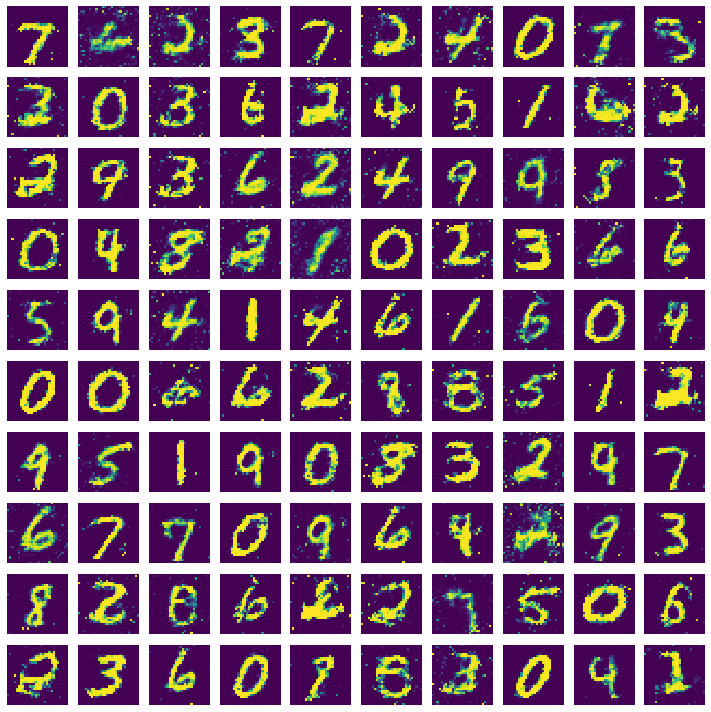

Epoch 31 disc loss 0.6493 Generator Loss 0.9501
Epoch 32 disc loss 0.6499 Generator Loss 0.9485
Epoch 33 disc loss 0.6481 Generator Loss 0.9473
Epoch 34 disc loss 0.6409 Generator Loss 0.9595
Epoch 35 disc loss 0.6452 Generator Loss 0.9568


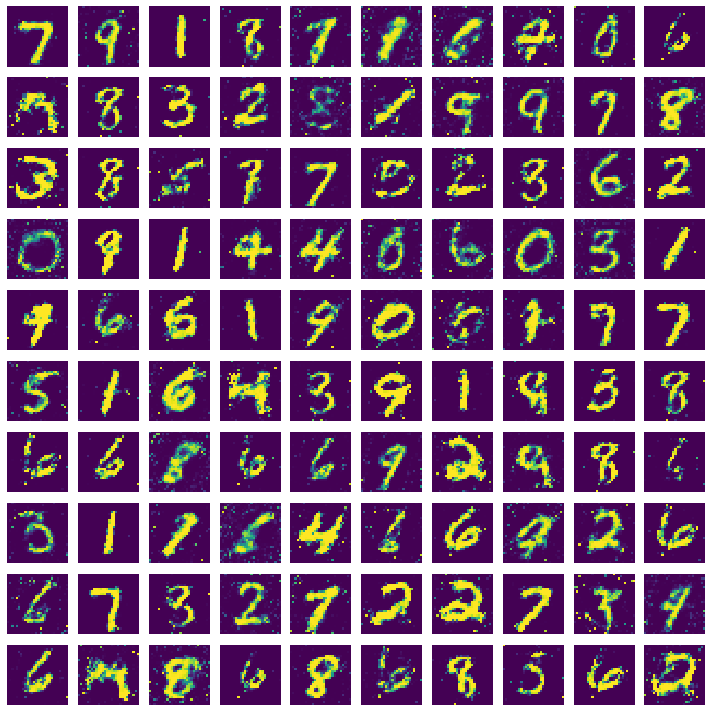

Epoch 36 disc loss 0.6458 Generator Loss 0.9553
Epoch 37 disc loss 0.6439 Generator Loss 0.9572
Epoch 38 disc loss 0.6440 Generator Loss 0.9619
Epoch 39 disc loss 0.6422 Generator Loss 0.9642
Epoch 40 disc loss 0.6463 Generator Loss 0.9543


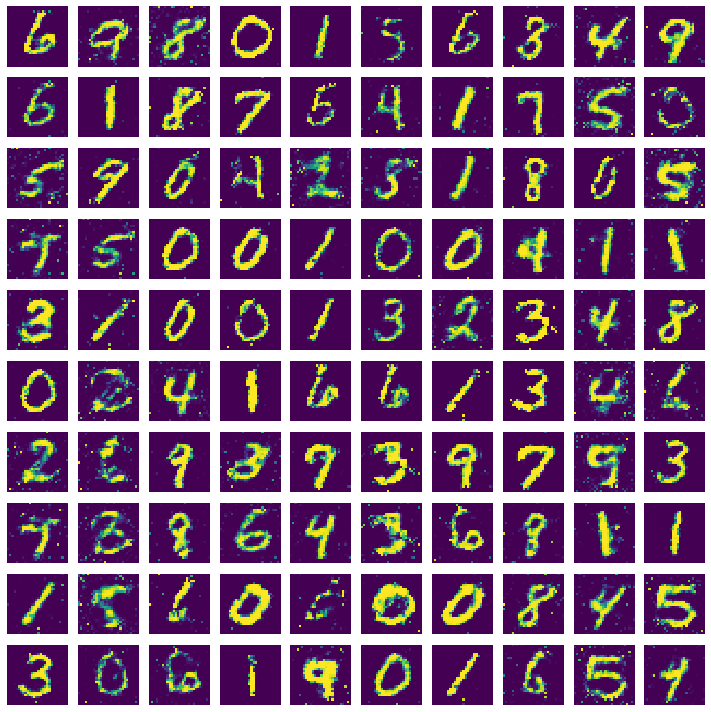

Epoch 41 disc loss 0.6406 Generator Loss 0.9719
Epoch 42 disc loss 0.6428 Generator Loss 0.9665
Epoch 43 disc loss 0.6391 Generator Loss 0.9700
Epoch 44 disc loss 0.6421 Generator Loss 0.9708
Epoch 45 disc loss 0.6427 Generator Loss 0.9657


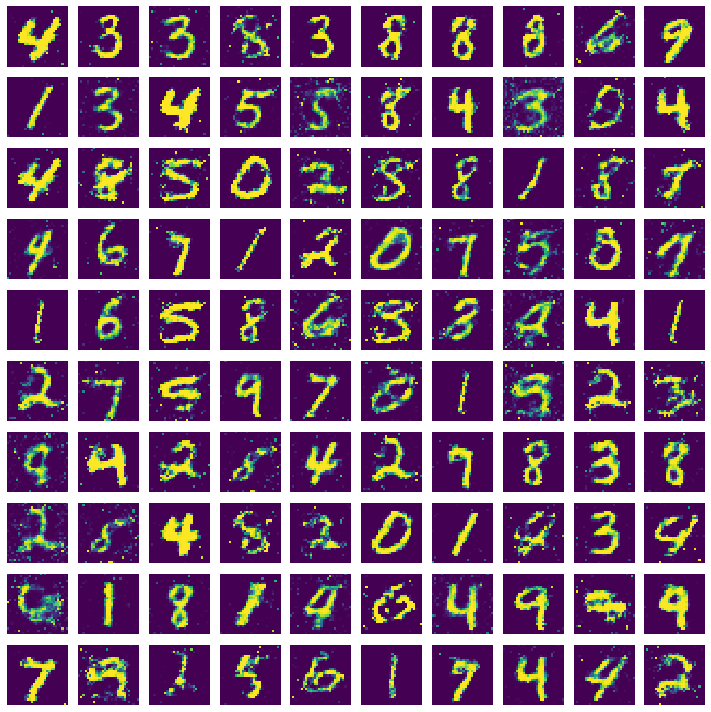

Epoch 46 disc loss 0.6411 Generator Loss 0.9695
Epoch 47 disc loss 0.6392 Generator Loss 0.9826
Epoch 48 disc loss 0.6355 Generator Loss 0.9851
Epoch 49 disc loss 0.6371 Generator Loss 0.9782
Epoch 50 disc loss 0.6356 Generator Loss 0.9850


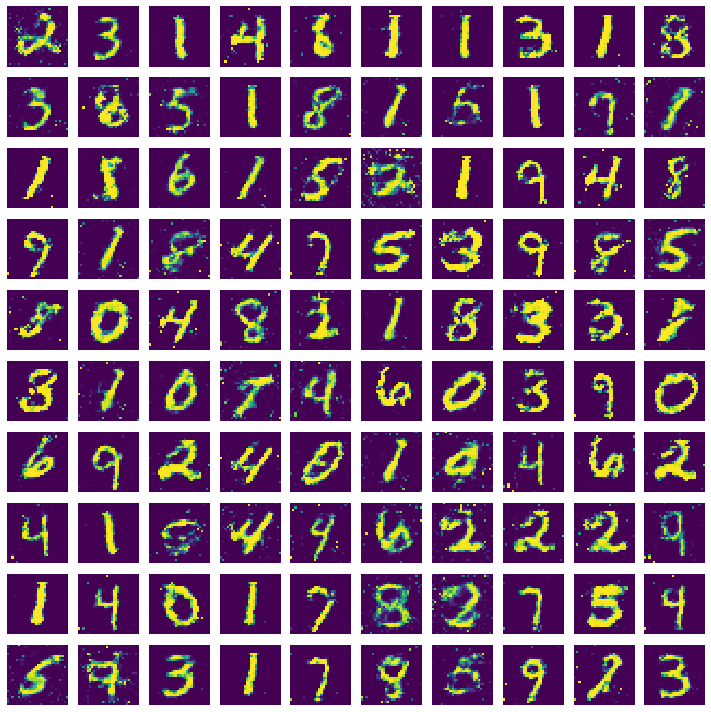

In [24]:
discriminator_losses=[]
generator_losses=[]

for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss=0.
    epoch_g_loss=0.
    
    #Mini Batch
    for batch in range(NO_OF_BATCHES):
        
        # Step 1 Train Discriminator
        # 50% real data + 50% fake data
        
        # Real data X
        idx=np.random.randint(0,X_train.shape[0],HALF_BATCH)
        real_imgs=X_train[idx]
        real_y=np.ones((HALF_BATCH,1))*0.9 # One side label smoothing
        
        # Fake Data X
        noise=np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_data=generator.predict(noise)
        fake_y=np.zeros((HALF_BATCH,1))
        
        # Train
        d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake=discriminator.train_on_batch(fake_data,fake_y)
        
        d_loss=0.5*d_loss_fake+0.5*d_loss_real
        
        epoch_d_loss+=d_loss
        
        
        # Step 2 Train Generator
        noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y=np.ones((BATCH_SIZE,1))
        model.train_on_batch(noise,ground_truth_y)
        g_loss=model.train_on_batch(noise,ground_truth_y)
        
        epoch_g_loss+=g_loss
    print("Epoch %d disc loss %0.4f Generator Loss %0.4f"%(
    (epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    
    discriminator_losses.append(epoch_d_loss)
    generator_losses.append(epoch_g_loss)
    if (epoch+1)%5==0:
        generator.save("model/generator_{}.h5".format(epoch+1))
        save_images(epoch)

In [21]:
def save_images(epoch,samples=100):
    noise=np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_img=generator.predict(noise)
    generated_img=generated_img.reshape(-1,28,28)
    
    plt.figure(figsize=(10,10))
    
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_img[i],interpolation="nearest")
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig("images/gan_output_epoch_{}.png".format(epoch+1))
    plt.show()

In [22]:
mkdir "images"

In [23]:
mkdir "model"